In [142]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)

from PyKomoran import *

komoran = Komoran(DEFAULT_MODEL['FULL'])
komoran.set_user_dic('D:/petition/user_dic.dic')

def komoran_tokenizer(sent,morphe):
    stopwords = ['하다', ',', '들', '이', '..', '.', '것', '다', '이다', '~', '그', '그녀', '저', '...', '"', '~~',"것", "이", "안","연합뉴스", "더", "왜", "때", "좀", "뭐", "거", "저", "뿐", "머","청원","오","수","년","끼","하",'개']
        
    words = komoran.get_list(sent)
    
    if morphe=='noun':
        words = [str(w) for w in words if ('/NN' in str(w))]
    if morphe=='verb':
        words = [str(w) for w in words if ('/VV' in str(w))]
    if morphe=='adj':
        words = [str(w) for w in words if ('/VA' in str(w))]

    r = []
    for w in [w.split("/")[0] for w in words]:
        if w not in stopwords:
            r.append(w)
    
    return r


In [153]:
emotion_data = emotion_comment_df = pd.read_pickle("../../petition/model/okt_comment_with_emo_over0.3.pkl")
emotion_data.head()

,disgust,sad,angry,fear,index,code,sdays,edays,title,count,content,category,progress,pre_content,prior_content,for_content,summary_content,summary_content_end,comment_token,check,emotion
0,0.000000,0.75,0.250000,0.0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ...","[못되다, 먹다, 눈물, 죄]",sad
1,0.000000,0.00,1.000000,0.0,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,"[군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ...","[못되다, 미치다]",angry
2,0.200000,0.20,0.600000,0.0,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,"[문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,...","[못되다, 처, 후, 후, 정]",angry
3,0.000000,0.00,1.000000,0.0,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,"[안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버...",[후],angry
4,0.666667,0.00,0.333333,0.0,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,"[안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축...","[정떨어지다, 정떨어지다, 정]",disgust


In [154]:
origin_data = pd.read_pickle("clean_data_for_sentiment_classification.pkl")
origin_data.shape

(17751, 16)

In [155]:
final_data = pd.merge(origin_data, emotion_data[['code','emotion']], how = 'left', on = 'code')

In [156]:
final_data['emotion'] = final_data['emotion'].fillna("dontknow")

In [157]:
final_data = final_data[['sdays','edays','code','title','count','content','category','progress','summary_content_end','emotion']]

In [158]:
final_data['title_len'] = final_data['title'].map(lambda x: len(x))

In [159]:
final_data['doc_len'] = final_data['content'].map(lambda x: len(x))

<AxesSubplot:xlabel='emotion', ylabel='title_len'>

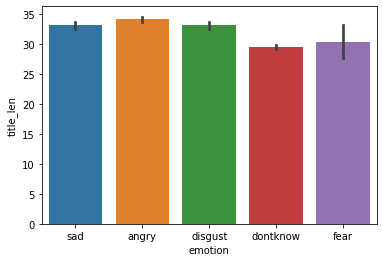

In [160]:
import seaborn as sns

sns.barplot(final_data['emotion'], final_data['title_len'])

<AxesSubplot:xlabel='emotion', ylabel='doc_len'>

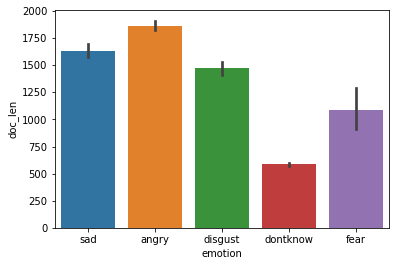

In [131]:
sns.barplot(final_data['emotion'], final_data['doc_len'])

<AxesSubplot:xlabel='emotion', ylabel='count'>

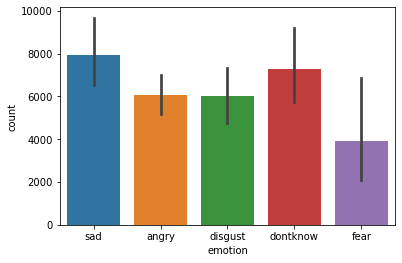

In [132]:
sns.barplot(final_data['emotion'], final_data['count'])

In [133]:
final_data['content_noun'] = [komoran_tokenizer(x, "noun") for x in final_data['content']]
final_data['content_verb'] = [komoran_tokenizer(x, "verb") for x in final_data['content']]
final_data['content_adj'] = [komoran_tokenizer(x, "adj") for x in final_data['content']]
final_data.shape

(17751, 10)

In [ ]:
# final_data.to_pickle('final_data_0429.pkl')

In [161]:
data = pd.read_pickle("final_data_0429.pkl")

In [162]:
del data['emotion']

In [163]:
final_data_end = pd.merge(data,final_data[['sdays','edays','code','emotion']], how = 'left', on = 'code')

In [164]:
final_data_end.head()

,code,title,count,content,category,progress,summary_content_end,title_len,doc_len,content_noun,content_verb,content_adj,sdays,edays,emotion
0,579353,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,80,1596,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유아, 폭행, 처벌, 재발, 방지, 방안...","[살, 키우, 있, 받, 믿, 되, 넘, 통하, 되, 통하, 바라, 때리, 울, 넣...","[없, 같, 그렇, 무섭, 늦, 수많, 많, 같, 비싸, 없, 이쁘, 많, 그렇, ...",2019-04-01,2019-05-01,sad
1,579401,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,49,1075,"[군사, 정권, 언론, 탄압, 12월, 출범, 이래, 지속, 정부, 인사, 개입, ...","[위하, 이르, 관하, 받, 미치, 되, 담기, 일삼, 있, 어긋나, 대하, 가로지...","[안타깝, 길, 많, 같, 없, 가쁘]",2019-04-04,2019-05-04,angry
2,579426,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,19,1585,"[문재인, 정부, 국정, 제로, 추진, 소방, 공무원, 국가, 직, 국회, 벽, 좌...","[있, 넘, 처하, 통하, 외치, 따르, 위하, 두, 관하, 이르, 빠지, 따르, ...","[늦, 강하, 별다르, 늦, 없, 늦, 크, 멀, 크, 적, 적, 적, 적, 크, ...",2019-04-05,2019-05-05,angry
3,579523,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,20,870,"[안녕하세요, 세간, 국민, 분노, 속칭, 사건, 이하, 사건, 수사, 글, 현재,...","[대하, 올리, 들이, 보, 이루어지, 관하, 대하, 있, 보이, 있, 통하, 알리...","[적, 크, 같, 없, 없, 없, 이렇]",2019-04-11,2019-05-11,angry
4,579585,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,30,1462,"[안녕하십니까, 사, 비글, 구조, 네트워크, 입, 니다, 오늘, 4월 15일, 자...","[통하, 대하, 되, 지나, 받, 걸치, 드리, 살, 알리, 위하, 있, 정하, 떠...","[어떻, 없, 크, 없]",2019-04-16,2019-05-16,disgust


In [165]:
final_data_end['title_token'] = [komoran_tokenizer(x, "noun") for x in final_data_end['title']]

In [166]:
final_data_end['total_token'] = final_data_end['title_token'] + final_data_end['content_noun']

# get test docs into a list
docs_test = final_data_end['total_token'].tolist()
docs_lst = [' '.join(x) for x in docs_test]

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.85,stop_words=['지금',"요약","인지","다기","부분","드리","일부","기간","가져오","대통령","청원","해주","통하","후에","지내","줄이","이나","위하","등등","시키","나오",'따르','인해','때문','문제','당장','청원','청와대'],max_features=10000)
word_count_vector = cv.fit_transform(docs_lst)

In [168]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_matrix = tfidf.fit(word_count_vector)
feature_names = cv.get_feature_names()


In [169]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [170]:
keyword_lst = []
for doc in docs_test:
    
    tf_idf_vector=tfidf.transform(cv.transform([' '.join(doc)]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    keyword_lst.append(extract_topn_from_vector(feature_names,sorted_items,10))

In [171]:
len(keyword_lst)

17751

In [172]:
final_data_end['top_keyword'] = keyword_lst

In [173]:
final_data_end['count_noun'] = final_data_end['content_noun'].map(lambda x: len(x))
final_data_end['count_verb'] = final_data_end['content_verb'].map(lambda x: len(x))
final_data_end['count_adj'] = final_data_end['content_adj'].map(lambda x: len(x))

In [174]:
final_data_end['target'] = final_data_end['count'].map(lambda x: 1 if x >=200000 else 0)

In [175]:
final_data_end['target'].value_counts()

0    17611
1      140
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count_noun'>

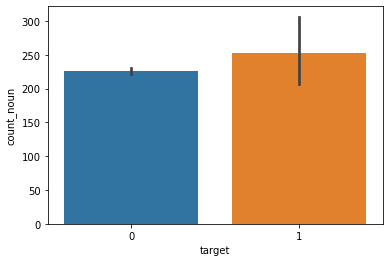

In [176]:
import seaborn as sns
sns.barplot(final_data_end['target'], final_data_end['count_noun'])

<AxesSubplot:xlabel='target', ylabel='count_verb'>

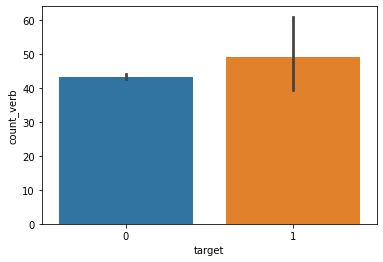

In [177]:
sns.barplot(final_data_end['target'], final_data_end['count_verb'])

<AxesSubplot:xlabel='target', ylabel='count_adj'>

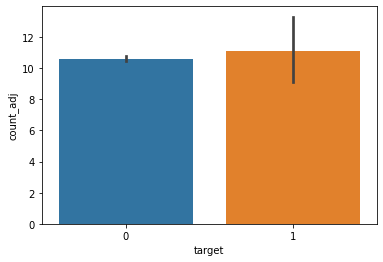

In [178]:
sns.barplot(final_data_end['target'], final_data_end['count_adj'])

In [179]:
# final_data_end.to_pickle("final_data_end_0429.pkl")

In [180]:
final_data_end

,code,title,count,content,category,progress,summary_content_end,title_len,doc_len,content_noun,content_verb,content_adj,sdays,edays,emotion,title_token,total_token,top_keyword,count_noun,count_verb,count_adj,target
0,579353,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,80,1596,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유아, 폭행, 처벌, 재발, 방지, 방안...","[살, 키우, 있, 받, 믿, 되, 넘, 통하, 되, 통하, 바라, 때리, 울, 넣...","[없, 같, 그렇, 무섭, 늦, 수많, 많, 같, 비싸, 없, 이쁘, 많, 그렇, ...",2019-04-01,2019-05-01,sad,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유아, 폭행, 처벌, 재발, 방지, 방안...","[정부, 아이돌봄, 서비스, 아이돌보미, 영유아, 폭행, 처벌, 재발, 방지, 방안...","{'아이돌봄': 0.495, '서비스': 0.319, '부부': 0.301, '아이...",247,54,18,1
1,579401,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,49,1075,"[군사, 정권, 언론, 탄압, 12월, 출범, 이래, 지속, 정부, 인사, 개입, ...","[위하, 이르, 관하, 받, 미치, 되, 담기, 일삼, 있, 어긋나, 대하, 가로지...","[안타깝, 길, 많, 같, 없, 가쁘]",2019-04-04,2019-05-04,angry,"[국민, 혈세, 지급, 원, 재정, 보조금, 제도, 전면, 폐지]","[국민, 혈세, 지급, 원, 재정, 보조금, 제도, 전면, 폐지, 군사, 정권, 언...","{'뉴스': 0.371, '공정': 0.334, '탄압': 0.212, '언론': ...",184,15,6,1
2,579426,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,19,1585,"[문재인, 정부, 국정, 제로, 추진, 소방, 공무원, 국가, 직, 국회, 벽, 좌...","[있, 넘, 처하, 통하, 외치, 따르, 위하, 두, 관하, 이르, 빠지, 따르, ...","[늦, 강하, 별다르, 늦, 없, 늦, 크, 멀, 크, 적, 적, 적, 적, 크, ...",2019-04-05,2019-05-05,angry,"[소방, 공무원, 국가, 직, 전환]","[소방, 공무원, 국가, 직, 전환, 문재인, 정부, 국정, 제로, 추진, 소방, ...","{'소방': 0.58, '국가': 0.344, '소방관': 0.327, '국회': ...",319,37,17,1
3,579523,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,20,870,"[안녕하세요, 세간, 국민, 분노, 속칭, 사건, 이하, 사건, 수사, 글, 현재,...","[대하, 올리, 들이, 보, 이루어지, 관하, 대하, 있, 보이, 있, 통하, 알리...","[적, 크, 같, 없, 없, 없, 이렇]",2019-04-11,2019-05-11,angry,"[룸, 인, 수사]","[룸, 인, 수사, 안녕하세요, 세간, 국민, 분노, 속칭, 사건, 이하, 사건, ...","{'수사': 0.622, '검경': 0.326, '속칭': 0.23, '조사': 0...",122,33,7,1
4,579585,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,30,1462,"[안녕하십니까, 사, 비글, 구조, 네트워크, 입, 니다, 오늘, 4월 15일, 자...","[통하, 대하, 되, 지나, 받, 걸치, 드리, 살, 알리, 위하, 있, 정하, 떠...","[어떻, 없, 크, 없]",2019-04-16,2019-05-16,disgust,"[대, 수의대, 실험, 중인, 퇴역, 탐지견, 구조]","[대, 수의대, 실험, 중인, 퇴역, 탐지견, 구조, 안녕하십니까, 사, 비글, 구...","{'실험': 0.367, '복제': 0.358, '네트워크': 0.276, '검역'...",267,39,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,597284,보육교사 월1회 코로나검사에대해 반대합니다!,91910.0,['저는 어린이집에서 근무하는 보육교사입니다길어지고 끝이안보이는 코로나로인해 모든국...,인권/성평등,청원진행중,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,24,819,"[어린이집, 근무, 보육, 교사, 끝, 이안, 보이, 코로, 나로, 인해, 국민, ...","[지치, 보, 빠지, 마치, 마치, 지내, 보내, 있, 그러, 걸리, 되, 허, 있...","[길, 좋, 크, 많, 같, 많, 많, 많, 같, 싫]",2021-03-30,2021-04-29,angry,"[보육, 교사, 월, 회, 코로나, 검사, 반대]","[보육, 교사, 월, 회, 코로나, 검사, 반대, 어린이집, 근무, 보육, 교사, ...","{'보육': 0.552, '교사': 0.454, '검사': 0.374, '어린이집'...",150,29,10,0
17747,597285,사람 목숨을 가지고 장난치는 악덕업자를 구속하여 주세요.......,1263.0,"['저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원 입니다,정말 분...",기타,청원진행중,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,37,1594,"[서해, 바다, 구조대, 17년, 간, 활동, 구조, 대원, 정말, 참, 국민, 대...","[있, 치, 만들, 되, 올리, 있, 있, 있, 계시, 받, 보내, 보, 있, 믿,...","[분하, 없, 없, 없, 없, 그렇, 멀, 없, 없, 심하, 심하, 없, 없, 그렇...",2021-03-30,2021-04-29,angry,"[사람, 목숨, 악덕, 업자, 구속]","[사람, 목숨, 악덕, 업자, 구속, 서해, 바다, 구조대, 17년, 간, 활동, ...","{'엔진': 0.477, '수리': 0.393, '업자': 0.287, '바다': ...",254,55,22,0
17748,597286,4차재난지원금 소상공인 버팀목자금 플러스,2767.0,['왜 4차재난지원금에 19년대비 20년도 매출을 고집하시나요영업제한으로 피해를 본...,기타,청원진행중,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,22,106,"[차, 재난, 지원금, 19년, 대비, 년대, 매출, 고집, 하시나, 요, 영업, ...","[지키, 나]",[],2021-03-30,2021-04-29,dontknow,"[차, 재난, 지원금, 소상공인, 버팀목, 자금, 플러스]","[차,

In [181]:
final_data_end = final_data_end[final_data_end['progress']!='청원진행중 ']

In [182]:
pd.crosstab(final_data_end['target'], final_data_end['progress'])

progress,답변완료,청원종료
target,,
0,1,17419
1,135,1


In [183]:
final_data_end.columns

Index(['code', 'title', 'count', 'content', 'category', 'progress',
       'summary_content_end', 'title_len', 'doc_len', 'content_noun',
       'content_verb', 'content_adj', 'sdays', 'edays', 'emotion',
       'title_token', 'total_token', 'top_keyword', 'count_noun', 'count_verb',
       'count_adj', 'target'],
      dtype='object')

In [380]:
df = final_data_end[['title','content','count','category','summary_content_end','title_len','doc_len','emotion','total_token','top_keyword','count_noun','count_verb','count_adj','target']]

In [381]:
df.columns

Index(['title', 'content', 'count', 'category', 'summary_content_end',
       'title_len', 'doc_len', 'emotion', 'total_token', 'top_keyword',
       'count_noun', 'count_verb', 'count_adj', 'target'],
      dtype='object')

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'title_len'}>,
        <AxesSubplot:title={'center':'doc_len'}>],
       [<AxesSubplot:title={'center':'count_noun'}>,
        <AxesSubplot:title={'center':'count_verb'}>,
        <AxesSubplot:title={'center':'count_adj'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

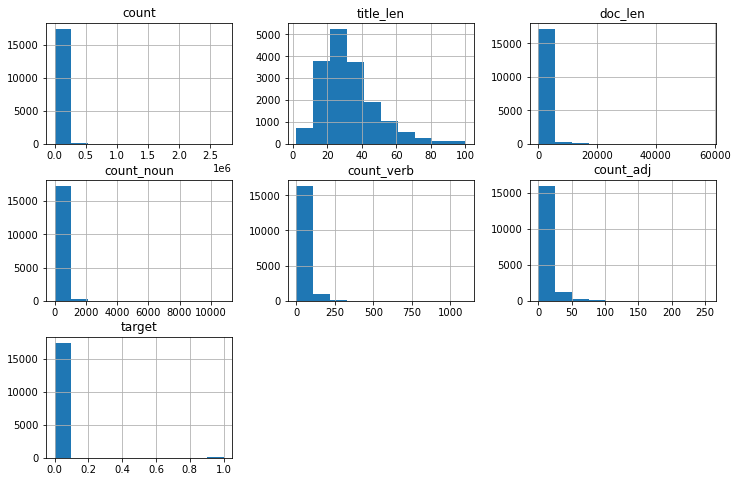

In [382]:
df.hist(figsize = (12, 8))

<AxesSubplot:>

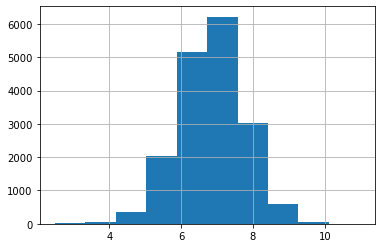

In [383]:
np.log(df['doc_len']).hist()

<AxesSubplot:>

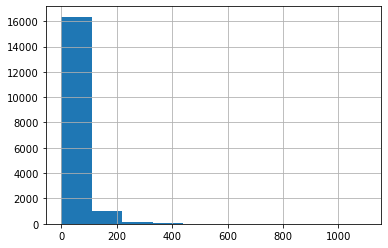

In [384]:
df['count_verb'].hist()

<AxesSubplot:>

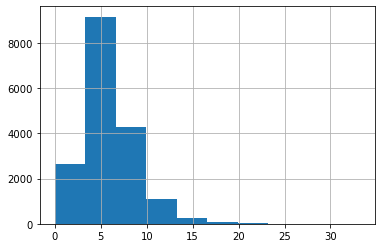

In [385]:
np.sqrt(df['count_verb']).hist()

<AxesSubplot:>

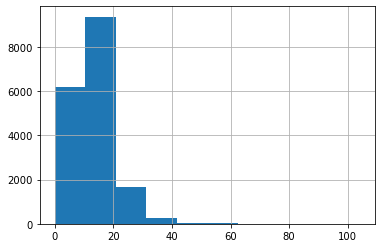

In [386]:
np.sqrt(df['count_noun']).hist()

* log는 에러 범위를 벗어나서

In [387]:
df['count'].mean()

6711.044258373206

In [388]:
df = df[df['count']>=6711]

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'title_len'}>,
        <AxesSubplot:title={'center':'doc_len'}>],
       [<AxesSubplot:title={'center':'count_noun'}>,
        <AxesSubplot:title={'center':'count_verb'}>,
        <AxesSubplot:title={'center':'count_adj'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

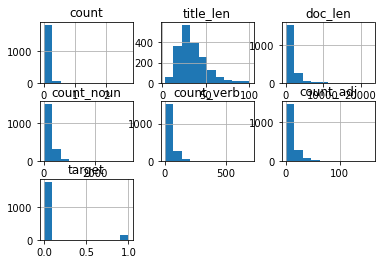

In [389]:
df.hist()

<AxesSubplot:>

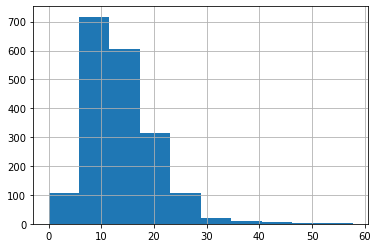

In [390]:
np.sqrt(df['count_noun']).hist()

In [391]:
df['log_doc_len'] = np.log(df['doc_len'])

In [392]:
df['sqrt_count_noun'] = np.sqrt(df['count_noun'])
df['sqrt_count_verb'] = np.sqrt(df['count_verb'])
df['sqrt_count_adj'] = np.sqrt(df['count_adj'])

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'title_len'}>,
        <AxesSubplot:title={'center':'doc_len'}>],
       [<AxesSubplot:title={'center':'count_noun'}>,
        <AxesSubplot:title={'center':'count_verb'}>,
        <AxesSubplot:title={'center':'count_adj'}>],
       [<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'log_doc_len'}>,
        <AxesSubplot:title={'center':'sqrt_count_noun'}>],
       [<AxesSubplot:title={'center':'sqrt_count_verb'}>,
        <AxesSubplot:title={'center':'sqrt_count_adj'}>, <AxesSubplot:>]],
      dtype=object)

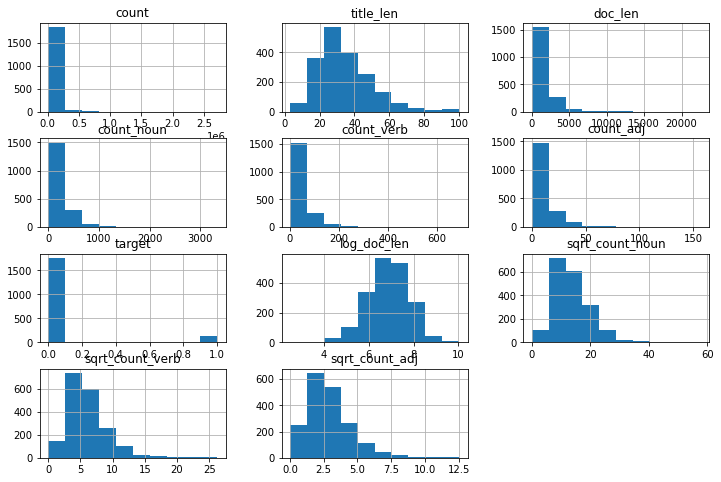

In [393]:
df.hist(figsize = (12,8))

In [394]:
df_new = df.drop(['title','content','doc_len','count_noun','count_verb','count_adj'],axis = 1)
df_new.shape

(1895, 12)

### OneHot Encoding

In [395]:
df_dummies = pd.get_dummies(df_new,columns = ['category','emotion'])

In [396]:
df_dummies = df_dummies.drop(['count','summary_content_end','total_token','top_keyword'], axis = 1)

In [397]:
df_dummies

,title_len,target,log_doc_len,sqrt_count_noun,sqrt_count_verb,sqrt_count_adj,category_경제민주화,category_교통/건축/국토,category_기타,category_농산어촌,category_문화/예술/체육/언론,category_미래,category_반려동물,category_보건복지,category_성장동력,category_안전/환경,category_외교/통일/국방,category_육아/교육,category_인권/성평등,category_일자리,category_저출산/고령화대책,category_정치개혁,category_행정,emotion_angry,emotion_disgust,emotion_dontknow,emotion_fear,emotion_sad
0,80,1,7.375256,15.716234,7.348469,4.242641,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,49,1,6.980076,13.564660,3.872983,2.449490,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,19,1,7.368340,17.860571,6.082763,4.123106,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,20,1,6.768493,11.045361,5.744563,2.645751,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,30,1,7.287561,16.340135,6.244998,2.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17480,40,0,7.254885,14.798649,6.244998,2.236068,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17508,24,0,6.324359,8.944272,4.690416,1.414214,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17509,28,0,6.129050,8.717798,2.828427,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17544,19,0,6.139885,9.165151,4.000000,1.414214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [398]:
df_dummies['target'].value_counts()

0    1759
1     136
Name: target, dtype: int64

In [399]:
df_dummies

,title_len,target,log_doc_len,sqrt_count_noun,sqrt_count_verb,sqrt_count_adj,category_경제민주화,category_교통/건축/국토,category_기타,category_농산어촌,category_문화/예술/체육/언론,category_미래,category_반려동물,category_보건복지,category_성장동력,category_안전/환경,category_외교/통일/국방,category_육아/교육,category_인권/성평등,category_일자리,category_저출산/고령화대책,category_정치개혁,category_행정,emotion_angry,emotion_disgust,emotion_dontknow,emotion_fear,emotion_sad
0,80,1,7.375256,15.716234,7.348469,4.242641,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,49,1,6.980076,13.564660,3.872983,2.449490,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,19,1,7.368340,17.860571,6.082763,4.123106,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,20,1,6.768493,11.045361,5.744563,2.645751,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,30,1,7.287561,16.340135,6.244998,2.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17480,40,0,7.254885,14.798649,6.244998,2.236068,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17508,24,0,6.324359,8.944272,4.690416,1.414214,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17509,28,0,6.129050,8.717798,2.828427,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17544,19,0,6.139885,9.165151,4.000000,1.414214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### train, test split

In [412]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_dummies, stratify = df_dummies['target'], test_size = 0.2, shuffle = True, random_state = 42)

In [413]:
print(train.shape)
print(test.shape)

(1516, 28)
(379, 28)


In [414]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']

X_test = test.drop(['target'], axis = 1)
y_test = test['target']

In [415]:
y_train.isnull().sum()

0

### 스케일링 및 오버샘플링 

In [410]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

In [411]:
len(list(y_train))

1516

In [320]:
from imblearn.over_sampling import SMOTE as sm

sm = SMOTE(random_state = 42)

X_resampled, y_resampled = sm.fit_sample(X_train,y_train)

In [321]:
print(X_resampled.shape)
print(y_resampled.shape)

(2814, 27)
(2814,)


In [322]:
y_resampled.value_counts()

1    1407
0    1407
Name: target, dtype: int64

### 예측

In [323]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # 분류
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

In [360]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def Modeling_result(train_x, train_y, valid_x, valid_y):
    
    models = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), XGBClassifier()]
    names = ["Logistic","RF","Ada","XGB"]

    train_acc = []
    train_precision = []
    train_recall = []
    train_roc = []

    valid_acc = []
    valid_precision = []
    valid_recall = []
    valid_roc = []


    for model, name in zip(models, names):

        model.fit(train_x,train_y)
        model.predict(valid_x)

        train_acc.append(accuracy_score(train_y,model.predict(train_x)))
        train_precision.append(precision_score(train_y,model.predict(train_x)))
        train_recall.append(recall_score(train_y,model.predict(train_x)))
        train_roc.append(roc_auc_score(train_y, model.predict(train_x)))

        valid_acc.append(accuracy_score(valid_y, model.predict(valid_x)))
        valid_precision.append(precision_score(valid_y,model.predict(valid_x)))
        valid_recall.append(recall_score(valid_y,model.predict(valid_x)))
        valid_roc.append(roc_auc_score(valid_y, model.predict(valid_x)))
        
    return pd.DataFrame({"Model":names, "Train_Accuracy":train_acc, "Train_Precision":train_precision, "Train_Recall":train_recall, "Train_AUC":train_roc,
             "Valid_Accuracy":valid_acc, "Valid_Precision":valid_precision, "Valid_Recall":valid_recall, "Valid_AUC":valid_roc})

In [361]:
print(X_resampled.shape)
print(y_resampled.shape)

print(X_test.shape)
print(y_test.shape)

(2814, 27)
(2814,)
(379, 27)
(379,)


In [362]:
right = Modeling_result(X_resampled, y_resampled, X_test.values, y_test)
right

[23:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_AUC
0,Logistic,0.659559,0.637815,0.738451,0.659559,0.071240,0.07124,1.0,0.500000
1,RF,1.000000,1.000000,1.000000,1.000000,0.928760,0.00000,0.0,0.500000
2,Ada,0.761905,0.747482,0.791045,0.761905,0.891821,0.00000,0.0,0.480114
3,XGB,0.996802,1.000000,0.993603,0.996802,0.928760,0.00000,0.0,0.500000


In [367]:
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)
cm

[23:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[352,   0],
       [ 27,   0]], dtype=int64)

In [368]:
accuracy_score(y_test, y_pred)

0.9287598944591029

In [369]:
print(xgb.feature_importances_)


0.9287598944591029

<function matplotlib.pyplot.show(close=None, block=None)>

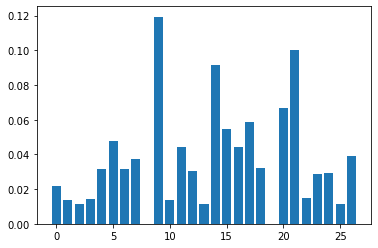

In [370]:
import matplotlib.pyplot as plt
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show

In [416]:
col =['title_len','log_doc_len','sqrt_count_noun','sqrt_count_verb','sqrt_count_adj']

from imblearn.over_sampling import SMOTE as sm

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train[col])
X_train = scaler.fit_transform(X_train[col])

sm = SMOTE(random_state = 42)

X_resampled, y_resampled = sm.fit_sample(X_train,y_train)


In [418]:
right = Modeling_result(X_resampled, y_resampled, X_test[col].values, y_test)
right

[23:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_AUC
0,Logistic,0.528429,0.530960,0.487562,0.528429,0.071240,0.07124,1.0,0.500000
1,RF,1.000000,1.000000,1.000000,1.000000,0.928760,0.00000,0.0,0.500000
2,Ada,0.703980,0.697115,0.721393,0.703980,0.865435,0.00000,0.0,0.465909
3,XGB,0.998579,0.999288,0.997868,0.998579,0.928760,0.00000,0.0,0.500000
